In [4]:
import sqlite3
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# データベースへの接続
conn = sqlite3.connect('tenki.sqlite')
cursor = conn.cursor()

# データベースからデータの取得
cursor.execute('SELECT date, pressure, temperature, humidity FROM weather_data')
data1 = cursor.fetchall()
cursor.execute('SELECT date, steps, stride_median, calories_burned FROM local_tenki')  # カラム数を合わせる
data2 = cursor.fetchall()

# 取得したデータをNumPyの配列に変換
data1_array = np.array([list(row)[1:] for row in data1])
data2_array = np.array([list(row)[1:] for row in data2])

# コサイン類似度の計算
cosine_similarity_matrix = cosine_similarity(data1_array, data2_array)
cosine_similarity_value = cosine_similarity_matrix[0, 0]  # 例として1つの類似度を取得

print("コサイン類似度:", cosine_similarity_value)

# データベース接続を閉じる
conn.close()

コサイン類似度: 0.9978052285031132


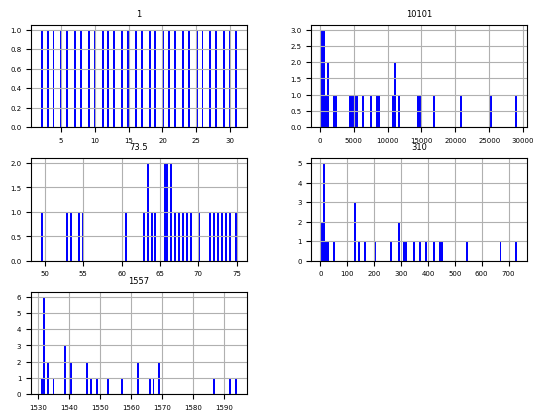

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ローカルデータ
df=pd.read_csv('/Users/takuto/dspro_last/ds_tenki/dspro_ローカルデータ.csv')
plt.rcParams["font.size"] = 5
df.hist(bins=100, color = "blue", grid =True, label = 'pandas')
plt.ylim(0,50)
plt.ylabel('frequency')
plt.xlabel('index')
plt.show()
plt.close()

In [8]:

# SQLiteデータベースへの接続
conn = sqlite3.connect('tenki.sqlite')

# データの取得
weather_data = pd.read_sql_query('SELECT date, pressure, temperature, humidity FROM weather_data', conn)
local_tenki = pd.read_sql_query('SELECT date, steps, stride_median, calories_burned FROM local_tenki', conn)

# データの結合
merged_data = pd.concat([weather_data.set_index('date'), local_tenki.set_index('date')], axis=1)

# 相関係数の計算
correlation_matrix = merged_data.corr()

# 相関係数行列の表示
print("相関係数行列:")
print(correlation_matrix)

# 特定の相関係数（例: column1とcolumn3の相関係数）を取得
specific_correlation = correlation_matrix.loc['pressure', 'calories_burned']
print(f"pressureとcalories_burnedの相関係数: {specific_correlation}")

# データベース接続を閉じる
conn.close()


相関係数行列:
                 pressure  temperature  humidity     steps  stride_median  \
pressure         1.000000    -0.513715 -0.334507  0.013989       0.158957   
temperature     -0.513715     1.000000  0.501016  0.249350      -0.168952   
humidity        -0.334507     0.501016  1.000000 -0.266274      -0.227823   
steps            0.013989     0.249350 -0.266274  1.000000       0.372258   
stride_median    0.158957    -0.168952 -0.227823  0.372258       1.000000   
calories_burned -0.085707     0.168329 -0.266428  0.882174       0.376606   

                 calories_burned  
pressure               -0.085707  
temperature             0.168329  
humidity               -0.266428  
steps                   0.882174  
stride_median           0.376606  
calories_burned         1.000000  
pressureとcalories_burnedの相関係数: -0.08570664596968033


In [10]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 8.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/takuto/dspro_last/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takuto/dspro_last/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takuto/dspro_last/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takuto/dspro_last/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takuto/dspro_last/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) miss

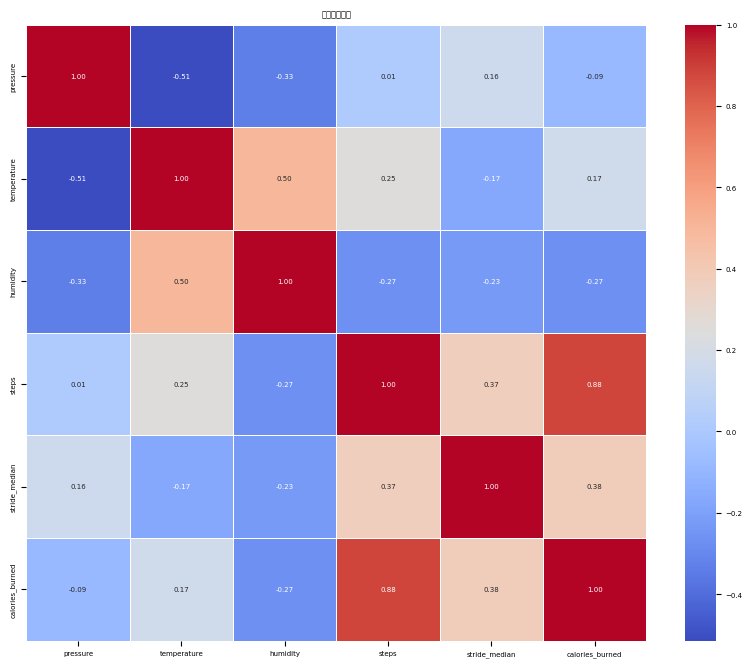

In [11]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# SQLiteデータベースへの接続
conn = sqlite3.connect('tenki.sqlite')

# データの取得
weather_data_query = 'SELECT date, pressure, temperature, humidity FROM weather_data'
local_tenki_query = 'SELECT date, steps, stride_median, calories_burned FROM local_tenki'

weather_data = pd.read_sql_query(weather_data_query, conn)
local_tenki = pd.read_sql_query(local_tenki_query, conn)

# データの結合
merged_data = pd.concat([weather_data.set_index('date'), local_tenki.set_index('date')], axis=1)

# 相関係数の計算
correlation_matrix = merged_data.corr()

# ヒートマップの表示
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('相関係数行列')
plt.show()

# データベース接続を閉じる
conn.close()

## 考察

今回収集したデータより気圧や気温、湿度はその日の人間個人の行動パターンに変化をもたらすほどの影響力を持っていないということを確認することができた。また、カロリー消費量の増加や気温と連動した歩行数の変化も確認することができなかった。しかし今回の分析で使用したデータは最後に年末が含まれており、極端に歩行数が減るなどがありあまり適していなかった。
今回の研究で気候の変化による人々の行動変化やエネルギーの消費量変化が起こると考えていたが目に見える範囲での変化を確認することはできなかった。これに関しては暖房や厚着を行うなど周辺環境の影響によって常に快適な空間が出来上がっていたのではないかという点や、１ヶ月の間に大きな気温の変化が起こらなかった点、人間の行動の元となる感情に関しても普遍的な数値で表現することができない点など数多くの問題点があったためであると考える。
